# 聚类分析实例练习参考

背景：

假设你拥有一家超市，并通过会员卡得到有关客户的一些基本信息，如：

- CustomerID
- gender
- sex
- annual income
- spending score（消费得分）。

消费得分是根据客户消费行为和购买，该数据为这中情况定义了一个特征，消费得分越高则消费金额越多。

现在希望了解并融合 【目标客户】的客户，以便给营销团队提供建议并相应地制定销售策略

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## data loading

In [10]:
data_path = '/Users/gawain/Desktop/1. Machine-Learning/9. 无监督-聚类算法/mall customers/Mall_Customers.csv'
df = pd.read_csv(data_path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## data visualization for different features

### annual income & age

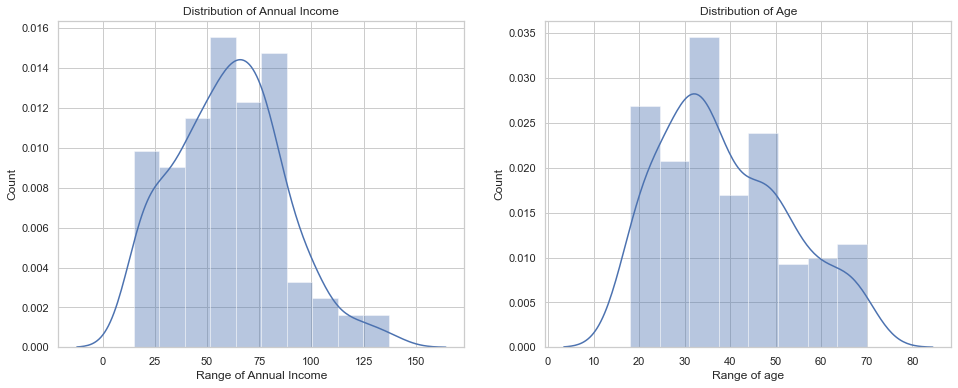

In [25]:
plt.rcParams['figure.figsize'] = (16, 6)

# subplot 1
plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

# subplot 2
plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

通过观察上图的 收入和年龄，可以发现：

1. 收入超过 100k$ 的非常少； 多数都在 50-75k$ 之间；收入最少的在 20k$ 左右

2. 主要客户的年龄在 30-35 之间； 超过50岁的客户数量较少； 20-30（年轻人）客户比中年人少。

### Gender Pie

In [16]:
gender_labels = ['Female', 'Male']
gender = df['Genre'].value_counts()
gender

Female    112
Male       88
Name: Genre, dtype: int64

In [17]:
color = ['orange', 'green']
explode = [0, 0.1]

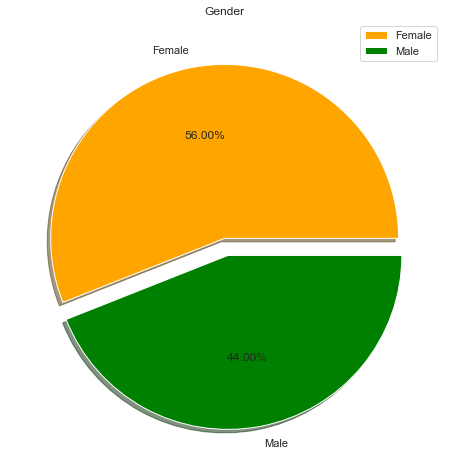

In [20]:
plt.figure(figsize=(8,8))
plt.pie(
            gender, 
            colors = color,
            explode = explode,
            labels = gender_labels,
            shadow = True,
            autopct = '%.2f%%' # 将gender的数字 放在饼图中
            )
plt.title('Gender')
plt.axis('off')
plt.legend()
plt.show()

通过观察上面的图，可以发现顾客性别分布情况

有趣的发现，顾客性别中，女性比例比男性的多。

### Distribution of Age

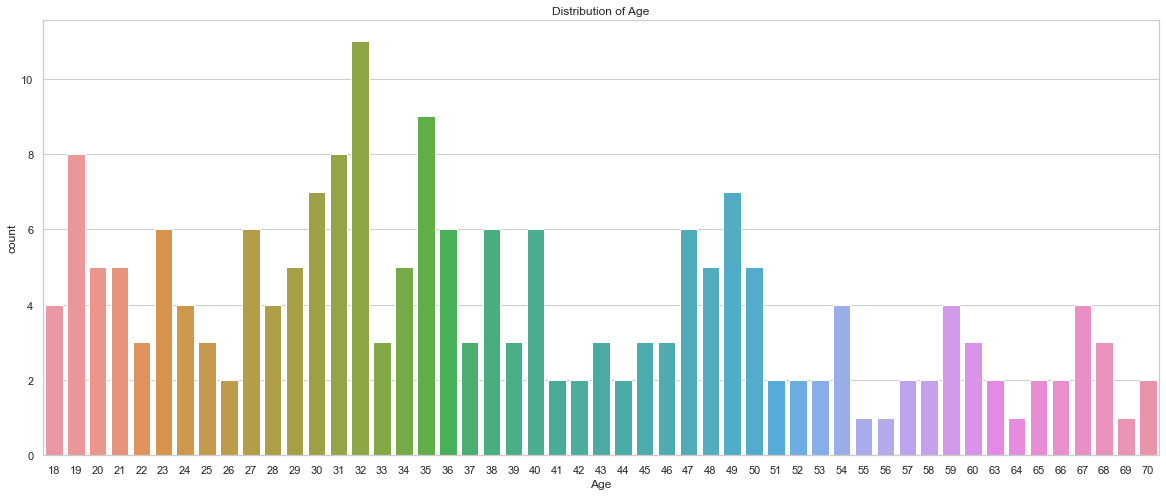

In [22]:
plt.figure(figsize =(20, 8))
sns.countplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

- 18 - 40岁的用户非常多，但没有明确的模式

- 18、24、28、54、59、67的数量相等

- 55、6、64、69 的数量最少

- 32岁的数量是最多的

### Distribution of Annual Income

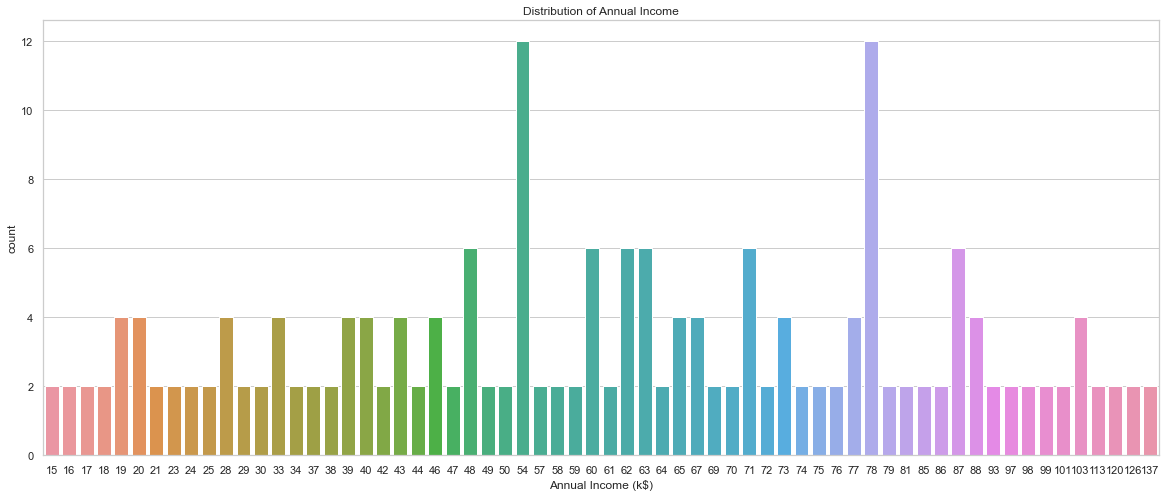

In [23]:
plt.figure(figsize =(20, 8))
sns.countplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.show()

- 对于收入来说，最低和最高的收入人群，消费的次数竟是一样的。

- 消费频率最高的是 54k$ 和 78k$

### Distribution of Spending Score

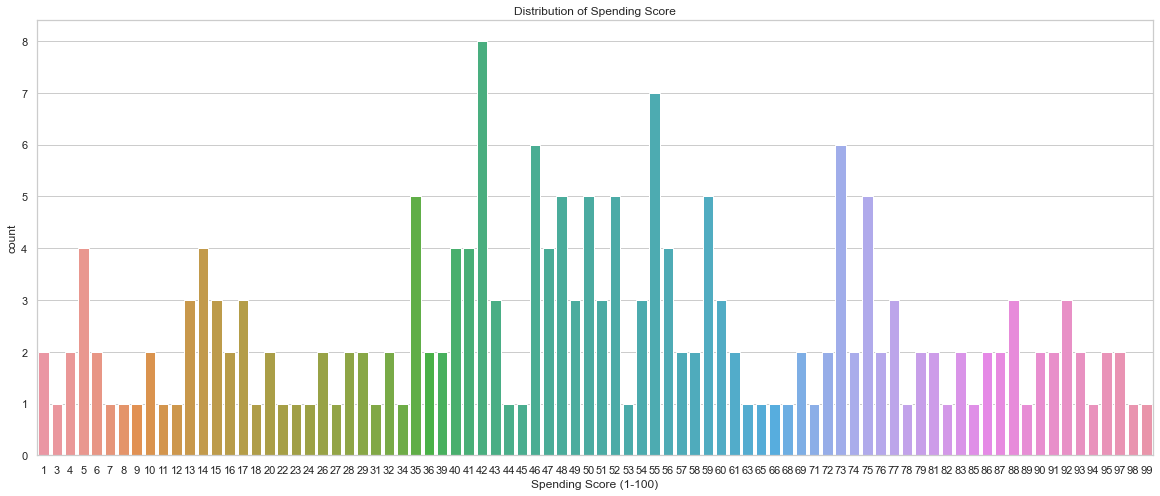

In [24]:
plt.figure(figsize =(20, 8))
sns.countplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score')
plt.show()

总体上讲，得出结论，大多数客户的消费得分在35-60之间

### Pairplot for the data

<Figure size 1440x576 with 0 Axes>

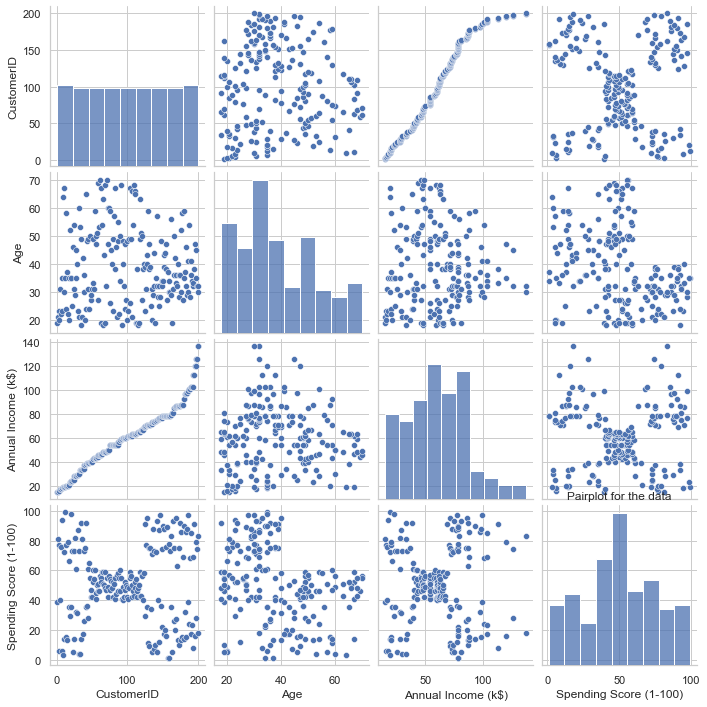

In [26]:
plt.figure(figsize =(20, 8))
sns.pairplot(df)
plt.title('Pairplot for the data')
plt.show()

可以找到的聚类 以及线性关系：

- Annual Income & CustomerID -> linear

- Spending Score & CustomerID -> clusters

- Spending Score & Annual Income -> clusters

- Spending Score & Age -> Hard to determine clusters(further study)

### Heatmap for the data ( corr() )

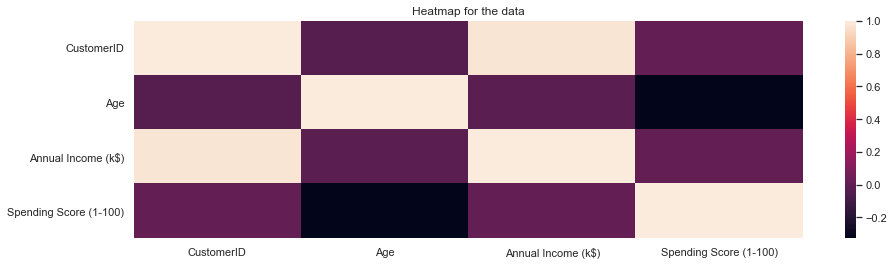

In [29]:
plt.figure(figsize =(15, 4))
sns.heatmap(df.corr())
plt.title('Heatmap for the data')
plt.show()

由于特征之间的相关性并不是很强，所以我们继续 ***使用所有的特征***

同时也因为特征之间的相关性没有非常低，所以我们针对于不同模型的融合 ***并不一定*** 有很好的效果。

### Gender VS Spending Score - boxenplot

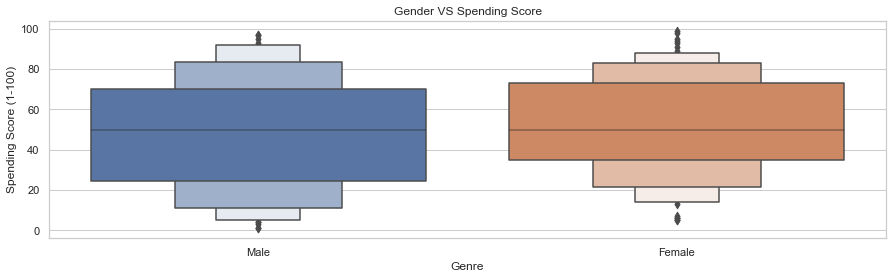

In [31]:
plt.figure(figsize =(15, 4))
sns.boxenplot(df['Genre'], df['Spending Score (1-100)'])
plt.title('Gender VS Spending Score')
plt.show()

性别 和 消费得分 的二元分析

- 多数男性在 25 - 70

- 多数女性在 35 - 75

我无法针对不同性别的年龄区间得出太多的结论

虽然案例中说，这表明了女性是购物主要群体

### Gender VS Annual Income - violinplot

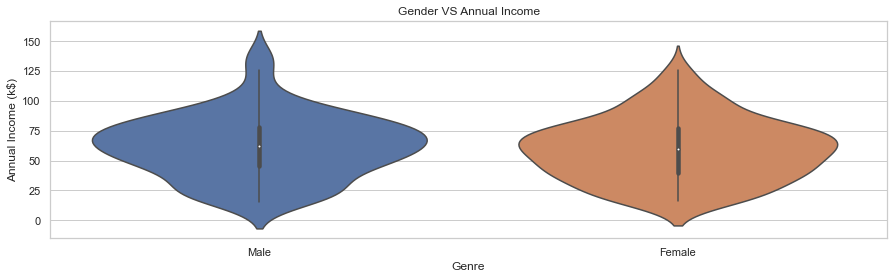

In [34]:
plt.figure(figsize =(15, 4))
sns.violinplot(df['Genre'], df['Annual Income (k$)'])
plt.title('Gender VS Annual Income')
plt.show()

- 50k$ 以上的收入中，男性数量 > 女性数量

- 收入较低时，男性和女性的数量是相等的


### Gender VS Age - stripplot


Text(0.5, 1.0, 'Gender VS Age')

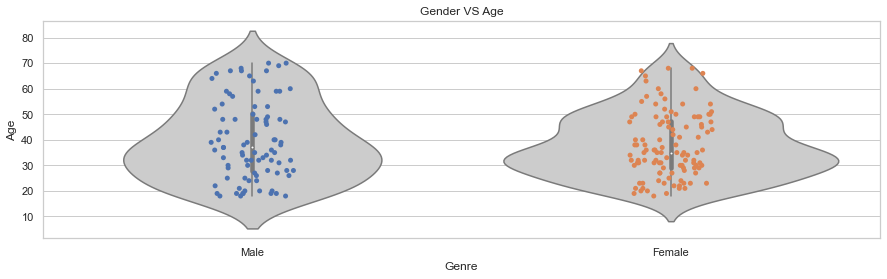

In [44]:
# reference: https://seaborn.pydata.org/generated/seaborn.stripplot.html
plt.figure(figsize =(15, 4))
ax = sns.violinplot('Genre', 
                        'Age', 
                        data = df, 
                        color=".8" # 这里是让 violin plot 的的颜色变成灰色，让 strip plot 的散点更明显
                        )

ax = sns.stripplot('Genre', 
                        'Age', 
                        data = df)
plt.title('Gender VS Age')
# plt.show()

### Annual Income vs Age and Spending Score

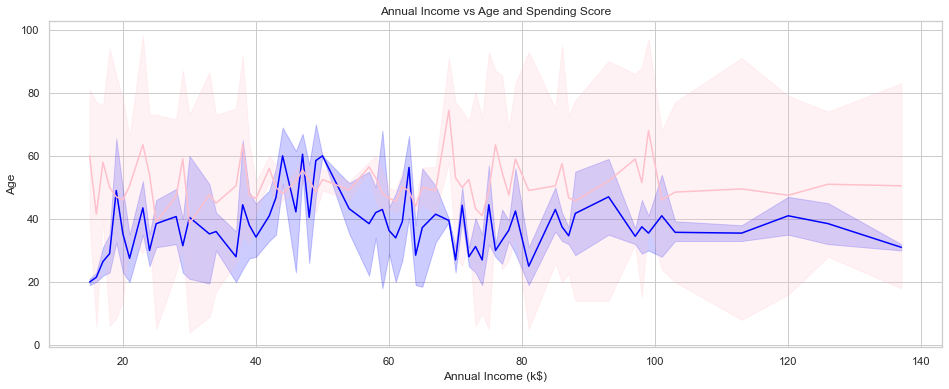

In [45]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title("Annual Income vs Age and Spending Score")
plt.show()

- 蓝色线： Age & Annual Income

- 粉色线： Age & Spending Score

## Customers' Annual Income Clustering ( Annual Income (k$) & Spending Score (1-100) )

In [46]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- Spending Score & CustomerID -> clusters

- Spending Score & Annual Income -> clusters （two features we will use for clustering）

In [49]:
x = df.iloc[:, [3, 4]].values
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [52]:
x.shape

(200, 2)

由于我们选取的特征是 “收入” & “消费积分”

所以针对聚类后的结果，我们可以对从 0-n 个 clusters 进行 **【用户级别】**

这个【用户级别】就是 收入和消费的比例
1. miser 吝啬用户
2. general 正常用户
3. target 目标用户
4. spendthrift 挥霍无度的人
5. careful 保守型

### K-mean & elbow method

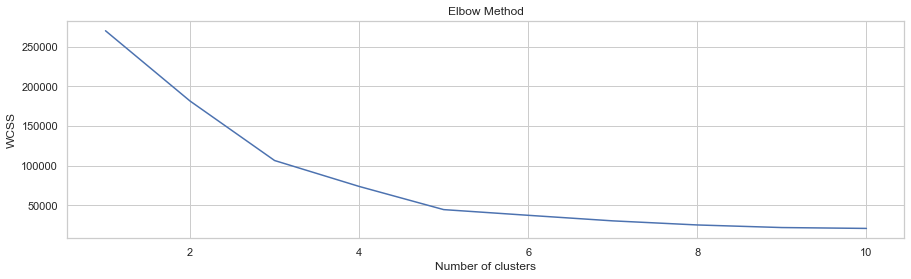

In [57]:
wcss = [] # 不同数组的结果

for i in range(1, 11):
      kmeans = KMeans(n_clusters = i,
                        init= 'k-means++',
                        max_iter = 300,
                        n_init = 10,
                        random_state = 0
                        )
      kmeans.fit(x)
      intertia = kmeans.inertia_ #!     Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
      wcss.append(intertia)

plt.figure(figsize = (15, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

如上图所示，使用肘部法可以发现： 

**当 k=5时， 下降幅度明显区域平缓**

### K-mean Clustering Visualization

In [59]:
kmean = KMeans(n_clusters = 5,
                  init = 'k-means++',
                  max_iter = 300,
                  n_init = 10,
                  random_state = 0
                  )
pred_y = kmean.fit_predict(x)

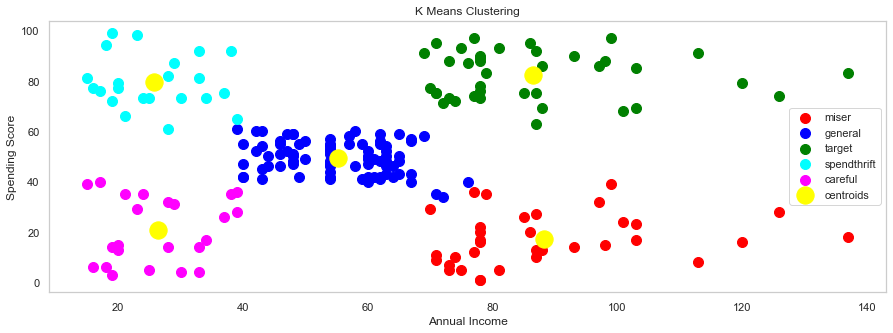

In [61]:
plt.figure(figsize=(15, 5))

# 单独画出5个cluster 
plt.scatter(x[pred_y == 0, 0], x[pred_y == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[pred_y == 1, 0], x[pred_y == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[pred_y == 2, 0], x[pred_y == 2, 1], s = 100, c = 'green', label = 'target')
plt.scatter(x[pred_y == 3, 0], x[pred_y == 3, 1], s = 100, c = 'cyan', label = 'spendthrift')
plt.scatter(x[pred_y == 4, 0], x[pred_y == 4, 1], s = 100, c = 'magenta', label = 'careful')

# 画出kmean训练好的模型中，得到的5个质心
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

***该聚类分析让我们对用户群里有了更清晰的认识。***

根据其 年收入 和 消费得分，有5个客户分类：

1. miser 吝啬型用户
2. general 一般型用户
3. target 目标用户
4. spendthrift 挥霍无度型用户
5. careful 节俭型用户

据称这是购物中心客户群的 最佳因素/属性

### hierarchy clustering - analyze number of cluster for AgglomerativeClustering

初步解释：

https://blog.csdn.net/weixin_26752765/article/details/108133419

使用树状图查找最佳集群

In [66]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [62]:
import scipy.cluster.hierarchy as sch

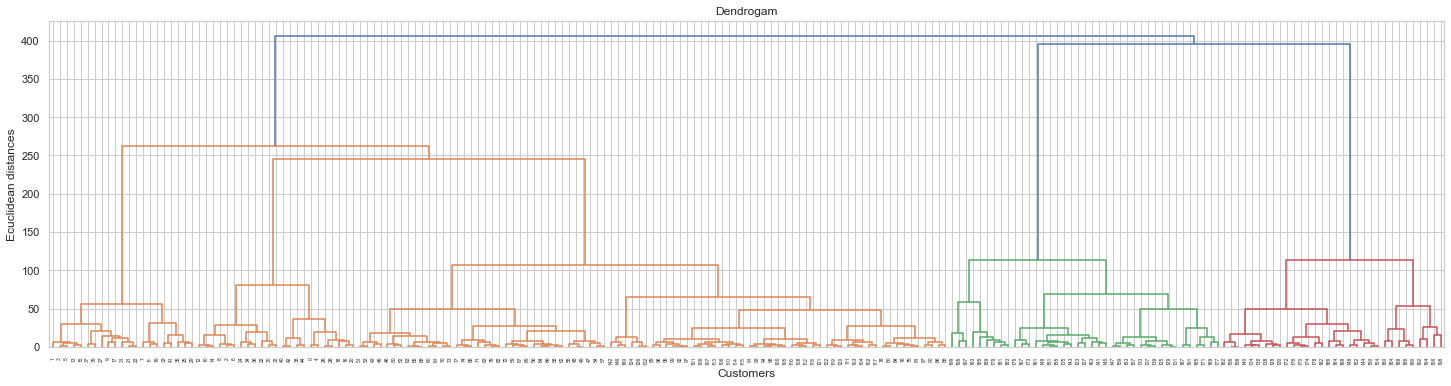

In [65]:
plt.figure(figsize =(25,6))

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward')) # dendrogram(树状图) ward是距离聚类的方法
plt.title("Dendrogam")
plt.xlabel("Customers")
plt.ylabel("Ecuclidean distances")
plt.show()

- 从大级别上来看，整体可以分成两组情况

- 而从细分的角度看，层次聚类可以分成4种（distance > 250），不过由于第二根橙色线太短，所以要下降一个级别

- 如果看再小的级别，层次聚类可以分成5种（ 100 < distance < 250），这种情况下主要的几个情况都被细分了出来（主要是橙色部分的一些细化的聚类可以凸显出来。）

- 所以，我们选择 clusters = 5

我们可以参照reference中的说法：
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

***If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters as shown in the following figure:***
<img src = 'https://github.com/GawainGan/contents/blob/main/customer-dengrogram-5-clusters%20-%20version1.png'>

同时，我们也可以参考reference2中的说法：

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019


1. Determine the largest vertical distance that doesn’t intersect any of the other clusters
2. Draw a horizontal line at both extremities
3. The optimal number of clusters is equal to the number of vertical lines going through the horizontal line

<img src = 'https://github.com/GawainGan/contents/blob/main/customer-dengrogram-5-clusters%20-%20version2.png' width="700" height="500">


### hierarchy visualization

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
hierclust = AgglomerativeClustering(n_clusters = 5, 
                                    affinity = 'euclidean', 
                                    linkage = 'ward')
hierclust_pred = hierclust.fit_predict(x)

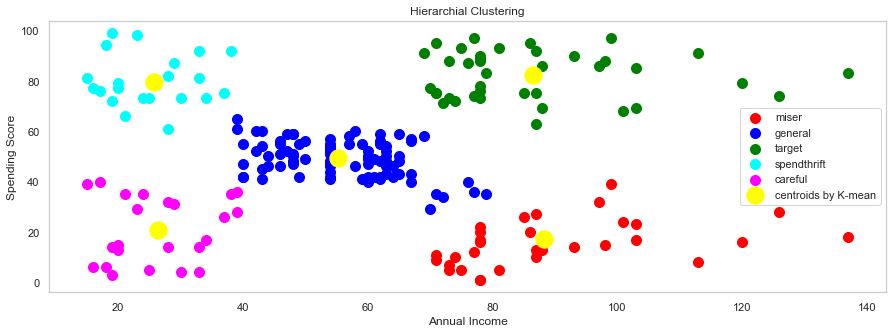

In [73]:
plt.figure(figsize=(15, 5))

# 单独画出5个cluster 
plt.scatter(x[hierclust_pred == 0, 0], x[hierclust_pred == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[hierclust_pred == 1, 0], x[hierclust_pred == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[hierclust_pred == 2, 0], x[hierclust_pred == 2, 1], s = 100, c = 'green', label = 'target')
plt.scatter(x[hierclust_pred == 3, 0], x[hierclust_pred == 3, 1], s = 100, c = 'cyan', label = 'spendthrift')
plt.scatter(x[hierclust_pred == 4, 0], x[hierclust_pred == 4, 1], s = 100, c = 'magenta', label = 'careful')

# 画出kmean训练好的模型中，得到的5个质心
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids by K-mean')

plt.title('Hierarchial Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.legend()


## Customers' Age Clustering ( Age & Spending Score (1-100) )

In [74]:
x_age_cluster = df.iloc[:, [2,4]].values
x_age_cluster[:5]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

In [75]:
print(x_age_cluster.shape)

(200, 2)


### k-mean

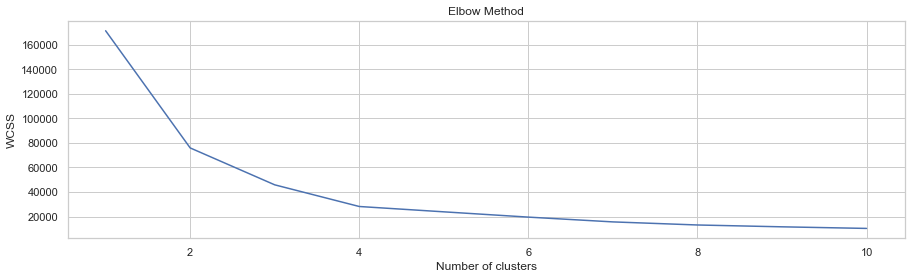

In [76]:
wcss = [] # 不同数组的结果

for i in range(1, 11):
      kmeans = KMeans(n_clusters = i,
                        init= 'k-means++',
                        max_iter = 300,
                        n_init = 10,
                        random_state = 0
                        )
      kmeans.fit(x_age_cluster)
      intertia = kmeans.inertia_ #!     Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
      wcss.append(intertia)

plt.figure(figsize = (15, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to elbow method, we should clusters = 4

### K-mean Clustering Visualization - 2D

In [86]:
kmean_by_age = KMeans(n_clusters = 4,
                  init = 'k-means++',
                  max_iter = 300,
                  n_init = 10,
                  random_state = 0
                  )
pred_y_age = kmean_by_age.fit_predict(x_age_cluster)

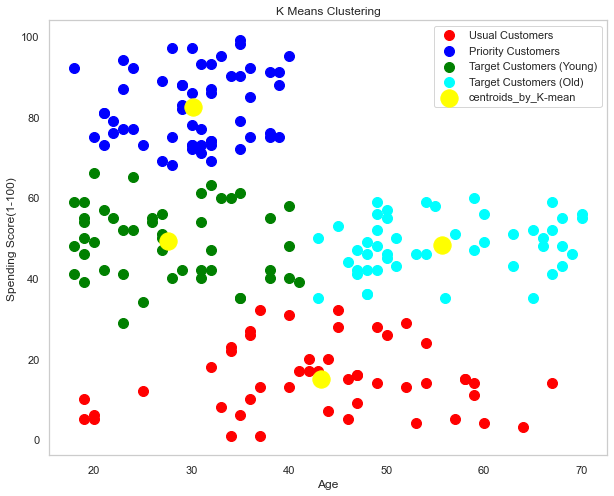

In [88]:
plt.figure(figsize=(10, 8))

# 单独画出5个cluster 
plt.scatter(x_age_cluster[pred_y_age == 0, 0], x_age_cluster[pred_y_age == 0, 1], s = 100, c = 'red', label = 'Usual Customers')
plt.scatter(x_age_cluster[pred_y_age == 1, 0], x_age_cluster[pred_y_age == 1, 1], s = 100, c = 'blue', label = 'Priority Customers')
plt.scatter(x_age_cluster[pred_y_age == 2, 0], x_age_cluster[pred_y_age == 2, 1], s = 100, c = 'green', label = 'Target Customers (Young)')
plt.scatter(x_age_cluster[pred_y_age == 3, 0], x_age_cluster[pred_y_age == 3, 1], s = 100, c = 'cyan', label = 'Target Customers (Old)')

# 画出kmean_by_age训练好的模型中，得到的5个质心
plt.scatter(kmean_by_age.cluster_centers_[:, 0], kmean_by_age.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids_by_K-mean')

plt.title('K Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.grid()
plt.show()

通过直觉上的观察，客户的 年龄 & 消费积分 的clustering，可以分成4种情况：

1. 常规客户
2. 主要客户
3. 年轻目标用户
4. 中老年目标用户

获得结果后，我们可以相应地制定不同的营销策略，来优化购物中心客户的消费积分

## K-mean Clustering Visualization - 3D

Three features:
1. Age
2. Annual Income
3. Spending Score


In [89]:
x_three_feat = df.iloc[:, [2,3,4]].values
x_three_feat[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]])

In [91]:
x_three_feat_cluster = KMeans(n_clusters = 4,
                              init = 'k-means++',
                              max_iter = 300,
                              n_init = 10,
                              random_state = 0)
x_three_feat_cluster.fit(x_three_feat)
three_feat_labels = x_three_feat_cluster.labels_ #    Labels of each point
centroids = x_three_feat_cluster.cluster_centers_

In [92]:
from mpl_toolkits.mplot3d import Axes3D

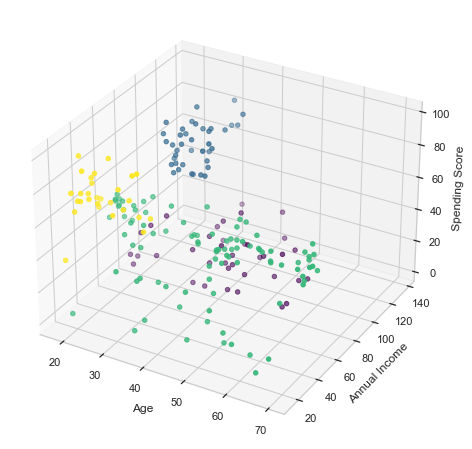

In [93]:
plt.figure(figsize=(10, 8))
ax1 = plt.axes(projection = '3d')
ax1.scatter3D(x_three_feat[:, 0], # Age
                  x_three_feat[:, 1], # Annual Income
                  x_three_feat[:, 2], # Spending Score
                  c = three_feat_labels, 
                  cmap = 'viridis')
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income')
ax1.set_zlabel('Spending Score')
plt.show()